In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

Train error without noise: 2.0896345435805507e+138
Test error without noise: 1.2110204484629578e+138

Standard deviation of noise: 0.01
Train error with noise: 4.716245257950011e+137
Test error with noise: 2.3509633269511204e+137

Standard deviation of noise: 0.05
Train error with noise: 1.8623165632218374e+143
Test error with noise: 4.826185862590521e+143

Standard deviation of noise: 0.1
Train error with noise: 6.93489377808377e+145
Test error with noise: 3.2209733216995264e+145

Standard deviation of noise: 0.5
Train error with noise: 1.1213920841084701e+150
Test error with noise: 2.9569940658475863e+146


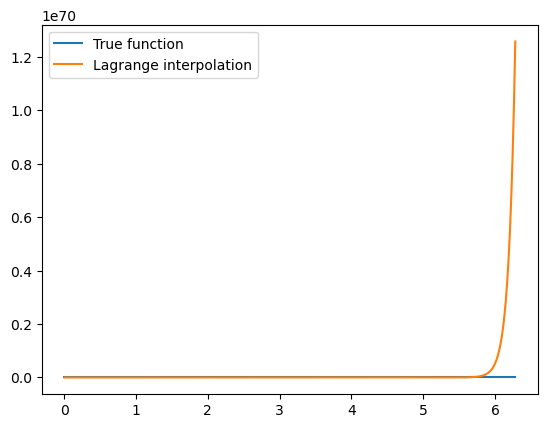

In [2]:
# Step 1: Generate training set
a, b = 0, 2*np.pi  # Interval [a, b]
n = 100
x_train = np.linspace(a, b, n)
y_train = np.sin(x_train)

# Step 2: Build model using Lagrange interpolation
polynomial = lagrange(x_train, y_train)

# Step 3: Generate test set
x_test = np.linspace(a, b, 1000)  # Using a denser distribution for testing
y_test = np.sin(x_test)
y_pred = polynomial(x_test)

train_error = np.mean((polynomial(x_train) - y_train)**2)
test_error = np.mean((y_pred - y_test)**2)

print(f"Train error without noise: {train_error}")
print(f"Test error without noise: {test_error}")

# Step 4: Add Gaussian noise to x and observe
std_devs = [0.01, 0.05, 0.1, 0.5]
for std in std_devs:
    noise = np.random.normal(0, std, x_train.shape)
    x_train_noisy = x_train + noise
    polynomial_noisy = lagrange(x_train_noisy, y_train)
    
    train_error_noisy = np.mean((polynomial_noisy(x_train_noisy) - y_train)**2)
    test_error_noisy = np.mean((polynomial_noisy(x_test) - y_test)**2)
    
    print(f"\nStandard deviation of noise: {std}")
    print(f"Train error with noise: {train_error_noisy}")
    print(f"Test error with noise: {test_error_noisy}")

# Optional: Plot the original and interpolated functions
plt.plot(x_test, y_test, label="True function")
plt.plot(x_test, y_pred, label="Lagrange interpolation")
plt.legend()
plt.show()